In [77]:
import numpy as np
import pandas as pd
import seaborn as sn
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import mercury as mr
from tabulate import tabulate
import matplotlib.pyplot as plt

In [78]:
import mercury as mr
app = mr.App(title="Gói 1",
        description="Làm bài đi",
        show_code=False,
        show_prompt=False,
        continuous_update=True,
        static_notebook=False,
        show_sidebar=True,
        full_screen=True,
        allow_download=True,
        stop_on_error=False
)

mercury.App

In [79]:
df2018= pd.read_excel('2018-Vietnam.xlsx')
df2019= pd.read_excel('2019-Vietnam.xlsx')
df2020= pd.read_excel('2020-Vietnam.xlsx')
df2021= pd.read_excel('2021-Vietnam.xlsx')
df2022= pd.read_excel('2022-Vietnam.xlsx')

In [80]:
df2018_copy = df2018.copy()
df2019_copy = df2019.copy()
df2020_copy = df2020.copy()
df2021_copy = df2021.copy()
df2022_copy = df2022.copy()

In [81]:
#Tỷ số thanh khoản
def tinh_ty_so_thanh_toan_hien_hanh(CA, TA):
    CR = CA / TA
    return CR
def tinh_ty_so_thanh_toan_nhanh(CA,In,TA):
    QR = (CA - In) / TA
    return QR
#Tỷ số quản lý tài sản
def vong_quay_hang_ton_kho(Sales,In):
    In_TO =  Sales / In
    return In_TO
def ky_thu_tien_binh_quan(AR,Sales):
    DSO = AR / (Sales/365)
    return DSO
def vong_quay_TSCD(Sales,Net_fixed_assets):
    FA_turnover = Sales / Net_fixed_assets
    return FA_turnover
def vong_quay_TTS(Sales,TA):
    TA_turnover = Sales / TA
    return TA_turnover
#Tỷ số quản lý nợ
def ty_so_no_vay(Total_debt, TA):
    Debt_ratio = Total_debt / TA
    return Debt_ratio

def EBIT():
    EBIT_value = df.loc[df['Mã'] == b, f"KQKD. Tổng lợi nhuận kế toán trước thuế {year}"].values[0] + df.loc[df['Mã'] == b, f"KQKD. Trong đó: Chi phí lãi vay {year}"].values[0]
    return EBIT_value

def EBITDA():
    EBIT_value = EBIT()
    EBITDA_value = EBIT_value + df.loc[df['Mã'] == b, f"LCTT. Khấu hao TSCĐ   {year}"].values[0]
    return EBITDA_value

def he_so_chi_tra_lai(EBIT, IE):
    TIE = EBIT / IE
    return TIE

def he_so_kha_nang_tra_no(EBITDA, tttienthue, laivay, no_goc):
    EBITDA_coverage = (EBITDA + tttienthue) / (laivay + tttienthue + no_goc)
    return EBITDA_coverage
# Tỷ số sinh lợi
def ty_le_lai_gop(Gross_profit, Sales):
    Gross_profit_margin = Gross_profit / Sales
    return Gross_profit_margin

def ty_le_lai_rong(Net_income, Sales):
    Net_profit_margin = Net_income / Sales
    return Net_profit_margin

def ty_le_loi_nhuan_hoat_dong(EBIT, Sales):
    Operating_margin = EBIT / Sales
    return Operating_margin

def ROA(Net_income, TA):
    ROA = Net_income / TA
    return ROA

def ROE(Net_income, CE):
    ROE = Net_income / CE
    return ROE

def ROIC(EBIT, T, Debt, Equity):
    ROIC = (EBIT * (1 - T)) / (Debt + Equity)
    return ROIC

def BEP(EBIT, TA):
    BEP = EBIT / TA
    return BEP

def he_so_nhan(TA, Equity):
    EM = TA / Equity
    return EM

def DUPONT_EQUATION(Net_profit_margin, TA_turnover, EM):
    ROEE = Net_profit_margin * TA_turnover * EM
    return ROEE

def PE(price,earning_per_share):
    PE = price / earning_per_share
    return PE

def MB(marketprice,bookvaluePS):
    MB= marketprice / bookvaluePS
    return MB



In [82]:
dfinfo= pd.read_excel('Price-Vol VN 2015-2023.xlsx', sheet_name="Info")
dfprice= pd.read_excel('Price-Vol VN 2015-2023.xlsx', sheet_name="Price")
dfvolume= pd.read_excel('Price-Vol VN 2015-2023.xlsx', sheet_name="Volume")

In [83]:
dfinfo_copy = dfinfo.copy()
dfprice_copy = dfprice.copy()
dfvolume_copy = dfvolume.copy()
dfinfo_copy =dfinfo_copy.rename(columns ={'Symbol': "Code"})
dfb=[dfinfo_copy,dfprice_copy,dfvolume_copy]

In [84]:
for df in dfb:
    df['Code'] = df['Code'].str.replace('VT:', '')
    df['Code'] = df['Code'].str.replace('(VO)', '')
    df['Code'] = df['Code'].str.replace('(P)', '')
    df.sort_values('Code', inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.columns = df.columns.astype(str)  # Chuyển đổi tên cột thành kiểu dữ liệu chuỗi
    df.drop(df.columns[2], axis=1, inplace=True)
df1 = dfb[1]  # Lấy phần tử thứ hai của danh sách dfb
df2 = dfb[2]  # Lấy phần tử thứ ba của danh sách dfb
df3=dfb[0]
#df3: infp
#df2: volume
#df1:price

In [85]:
df1 =df1.rename(columns ={'Code': "Date"})
df1= df1.drop("Name", axis=1)
df1 = df1.transpose()
new_header = df1.iloc[0]
df1 = df1[1:]
df1.columns = new_header
df1 = df1.reset_index()
df1 = df1.rename(columns={'index': 'Date'})
df1= df1.sort_values(by='Date', ascending=True)
df1['Date'] = pd.to_datetime(df1['Date']).dt.strftime('%Y/%m/%d')
#print('------------------------')
df2 =df2.rename(columns ={'Code': "Date"})
df2= df2.drop("Name", axis=1)
df2 = df2.transpose()
new_header = df2.iloc[0]
df2 = df2[1:]
df2.columns = new_header
df2 = df2.reset_index()
df2= df2.rename(columns={'index': 'Date'})
df2= df2.sort_values(by='Date', ascending=True)
df2['Date'] = pd.to_datetime(df2['Date']).dt.strftime('%Y/%m/%d')

In [86]:
in4_column = df3[['Code', 'Start Date']].copy()
in4_column['Start Date'] = pd.to_datetime(in4_column['Start Date']).dt.strftime('%Y/%m/%d')

In [87]:
dfa = [df2018_copy, df2019_copy, df2020_copy, df2021_copy, df2022_copy]
for df in dfa:
    df.drop(df.index[:7], inplace=True)
    df.columns = df.iloc[0]
    df.drop(df.index[0], inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.rename_axis("Số index", axis=1, inplace=True)
    df.sort_index(axis=0, inplace=True)

for df in dfa:
     df.drop(df.columns[[4, 5, 6,8,9,10]], axis=1, inplace=True)

for df in dfa:
    columns = df.columns
    columns = [col.replace('\nHợp nhất\nQuý: Hàng năm\nNăm:', '') for col in columns]
    df.columns = columns

for df in dfa:
    columns = df.columns
    columns = [col.replace('\nĐơn vị: Triệu VND', '') for col in columns]
    df.columns = columns

df = dfa[0]
for i in range(1, len(dfa)):
    df = pd.merge(df, dfa[i], on=['Mã', 'STT', 'Sàn', 'Tên công ty', 'Ngành ICB - cấp 4'])

df.sort_values('Mã', inplace=True)
df.reset_index(drop=True, inplace=True)
df.columns = df.columns.astype(str)  # Chuyển đổi tên cột thành kiểu dữ liệu chuỗi
df.rename(columns={'STT': 'STT1'}, inplace=True)



In [88]:
#print(df2018_copy.columns)

In [89]:
ticker_textbox=mr.Text(value="DGC",
               label="Nhập mã cổ phiếu")


mercury.Text

In [90]:
symbol_to_lookup = ticker_textbox.value.upper()

# Tìm kiếm dữ liệu dựa trên mã symbol
result = df3[df3["Code"] == symbol_to_lookup]
result1=df2018_copy[df2018_copy['Mã']==symbol_to_lookup]
# Lấy giá trị ngành từ kết quả tìm kiếm
industry = result1["Ngành ICB - cấp 4"].values[0]

# Tìm các mã có cùng ngành
selected_companies = df2018_copy[df2018_copy['Ngành ICB - cấp 4'] == industry]['Mã'].values
# Xuất tên công ty và ngành công nghiệp
company_name = result["Name"].values[0]
industry = result["Sector"].values[0]
start_date=result['Start Date'].values[0]
exchange=result1['Sàn'].values[0]
ma_nganh=result1['Ngành ICB - cấp 4'].values[0]

# Bảng tóm tắt nhanh về mã cổ phiếu 📝

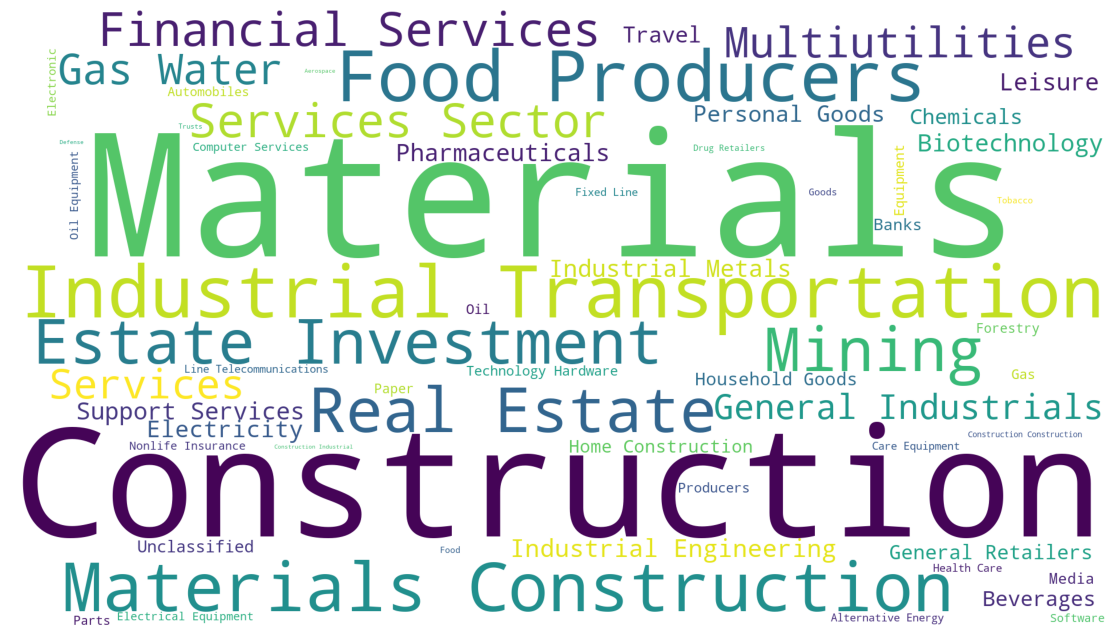

In [91]:
import wordcloud
from wordcloud import WordCloud
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(df3['Sector']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Các thông tin cơ bản

In [92]:
from bloxs import B


B([
    B(data=f'<div style="background-color: darkblue; color: white;  text-align: center; font-size: 30px; overflow: auto;">{company_name}</div>', title="<strong>Tên doanh nghiệp</strong>"),
    B(data=f'<div style="background-color: lightgreen; color: black;  text-align: center; font-size: 30px; overflow: auto;">{industry}</div>', title="<strong>Ngành công nghiệp</strong>"),
    B(data=f'<div style="background-color: red; color: white; text-align: center; font-size: 30px; overflow: auto;">{exchange}</div>', title="<strong>Mã sàn</strong>")
])




In [93]:
total_companies = len(selected_companies)
B([
    B(data=f'<div style="background-color: yellow; color: black; text-align: center; font-size: 30px;">{ma_nganh}</div>', title="<strong>Thuộc nhóm ngành</strong>"),
    B(data=f'<div style="background-color: orange; color: black;  text-align: center; font-size: 30px;">{start_date}</div>', title="<strong>Ngày niêm yết</strong>"),
    B(data=f'<div style="background-color: pink; color: black;  text-align: center; font-size: 30px;">{total_companies} công ty</div>', title="<strong>Số lượng doanh nghiệp chung ngành</strong>")
])


Danh sách các công ty có mã ngành Sản phẩm hóa dầu, Nông dược & Hóa chất khác: 


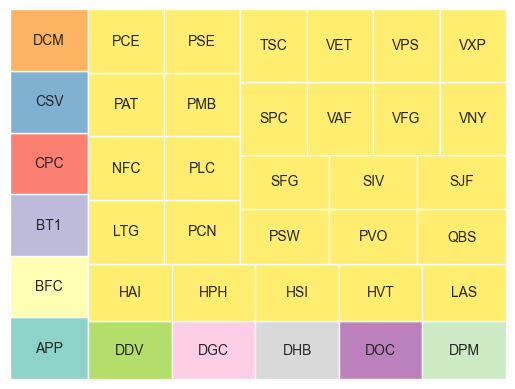

In [94]:
import matplotlib.cm as cm
import squarify
# Sắp xếp danh sách công ty theo thứ tự bảng chữ cái
selected_companies.sort()

# Kích thước cho từng ô trong Treemap chart
sizes = [1] * len(selected_companies)

# Tạo mảng màu sắc hợp lệ
color = cm.Set3(range(len(selected_companies)))

# Tạo Treemap chart
squarify.plot(sizes=sizes, label=selected_companies, color=color)

# Tắt các trục
plt.axis('off')
print("Danh sách các công ty có mã ngành {}: ".format(result1['Ngành ICB - cấp 4'].values[0]))
# Hiển thị biểu đồ
plt.show()

In [95]:
print('Historic stock price 📈')
filtered_df = in4_column.loc[in4_column['Code'] == symbol_to_lookup]

if not filtered_df.empty:
    # Truy cập cột 'Start Date' của DataFrame lọc
    start_date = filtered_df['Start Date'].values[0]

    # Lọc các hàng từ 'start date' trở về sau trong DataFrame 'df'
    filtered_date_df = df1.loc[df1['Date'] >= start_date]

    # Kiểm tra nếu DataFrame lọc không rỗng
    if not filtered_date_df.empty:
        # Kiểm tra tên cột 'a' có tồn tại trong DataFrame lọc hay không
        if symbol_to_lookup in filtered_date_df.columns:
            # Truy cập cột 'a' của DataFrame lọc
            close_price = filtered_date_df[symbol_to_lookup]

            # Tạo DataFrame mới từ cột 'Start Date' và 'a'
            merged_df = pd.DataFrame({'Start Date': filtered_date_df['Date'], symbol_to_lookup: close_price})

            # Lọc các ngày có khối lượng giao dịch
            filtered_volume_df = df2.loc[df2[symbol_to_lookup] > 0]

            # Lấy chỉ mục của các ngày có khối lượng giao dịch không null
            indices = filtered_volume_df[symbol_to_lookup].notnull()

            filtered_volume_df = filtered_volume_df[indices]

            # Lấy chỉ mục của các ngày có khối lượng giao dịch từ DataFrame 'merged_df'
            merged_indices = merged_df['Start Date'].isin(filtered_volume_df['Date'])

            merged_df = merged_df[merged_indices]

            fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

            fig.add_trace(go.Scatter(x=merged_df['Start Date'], y=merged_df[symbol_to_lookup], mode='lines', name='Giá đóng cửa', line=dict(color='blue'), connectgaps=True), row=1, col=1)
            fig.add_trace(go.Bar(x=filtered_volume_df['Date'], y=filtered_volume_df[symbol_to_lookup], name='Khối lượng', marker=dict(color='green')), row=2, col=1)

            fig.update_layout(
                title=f"Biểu đồ giá đóng cửa và khối lượng giao dịch của cổ phiếu {symbol_to_lookup}",
                xaxis=dict(title='Ngày'),
                yaxis=dict(title='Giá đóng cửa'),
                showlegend=False
            )

            fig.update_yaxes(title_text='Khối lượng', row=2, col=1)

            fig.show()

        else:
            print(f"Không tìm thấy cột '{symbol_to_lookup}' trong DataFrame lọc.")
    else:
        print(f"Không tìm thấy dữ liệu từ '{start_date}' trở đi trong DataFrame 'df'.")
else:
    print(f"Không tìm thấy mã '{symbol_to_lookup}' trong DataFrame 'in4_column'.")


Historic stock price 📈


In [96]:
# Chọn checkbox
hienkq = mr.Checkbox(value=True, label="Hiện kết quả đã chọn")

mercury.Checkbox

In [97]:
cac_bao_cao = ['CĐKT', 'KQKD', 'LCTT', 'TM BCTT', 'BCTCKH']
select_variable1 = mr.MultiSelect(
    label='Chọn các báo cáo',
    choices=cac_bao_cao,value=['CĐKT']
)
years=['2018','2019','2020','2021','2022']

import re
import textwrap
if hienkq.value and 'CĐKT' in select_variable1.value:
    print(f'Bảng cân đối kế toán của mã {symbol_to_lookup}')
    selected_years = years
    df_concat = pd.DataFrame()

    for year in selected_years:
        df_filtered = globals()[f'df{year}_copy'].loc[globals()[f'df{year}_copy']['Mã'] == symbol_to_lookup]
        cdkt_columns = df_filtered.filter(regex=r'^CĐKT', axis=1)
        df_melted = cdkt_columns.reset_index().melt(id_vars=['index'], var_name='Cột', value_name='Giá trị')
        df_concat = pd.concat([df_concat, df_melted['Giá trị']], axis=1)
        df_melted['Tên gọi'] = df_melted['Cột'].apply(lambda x: re.sub(r'2022', '', x).strip())
        df_melted['Tên gọi'] = df_melted['Tên gọi'].str.replace(r'^CĐKT\.', '', regex=True).str.strip()
    
    df_concat.columns = selected_years
    df_concat = pd.concat([df_melted['Tên gọi'], df_concat], axis=1)
        # Tính toán kích thước cột
    num_columns = len(df_concat.columns)
    column_width = 10 / num_columns  # Kích thước của mỗi cột (cm)
    
    # Tính toán kích thước dòng
    table_height = 8  # Chiều cao của bảng (cm)
    row_height = table_height / len(df_concat)  # Kích thước của mỗi dòng (cm)
    
    # Chuyển đổi kích thước bảng thành pixel
    scale_factor = 4  # Tỉ lệ chuyển đổi từ cm sang pixel (tùy chọn)
    table_width_px = num_columns * column_width * scale_factor
    table_height_px = len(df_concat) * row_height * scale_factor
    
    # In bảng với kích thước tùy chỉnh
    table = tabulate(df_concat, headers='keys', tablefmt='fancy_grid', showindex=False, numalign='center', stralign='center', floatfmt=".1f")
    print(table)

if hienkq.value:
    if 'KQKD' in select_variable1.value:
        print(f'Bảng báo cáo kết quả kinh doanh của mã {symbol_to_lookup}')
        selected_years = years
        df_concat = pd.DataFrame()
        for year in selected_years:
            df_filtered = globals()[f'df{year}_copy'].loc[globals()[f'df{year}_copy']['Mã'] == symbol_to_lookup]
            # Lọc các cột có tên bắt đầu bằng "CĐKT"
            kqkd_columns = df_filtered.filter(regex=r'^KQKD', axis=1)
            
            # Sử dụng phương thức melt để biến đổi DataFrame
            df_melted = kqkd_columns.reset_index().melt(id_vars=['index'], var_name='Cột', value_name='Giá trị')
            
            # Sắp xếp lại DataFrame theo thứ tự tên cột nằm theo hàng dọc
            df_concat = pd.concat([df_concat, df_melted['Giá trị']], axis=1)
            df_melted['Tên gọi'] = df_melted['Cột'] # Add the column with the names
            df_melted['Tên gọi'] = df_melted['Cột'].apply(lambda x: re.sub(r'2022', '', x).strip())
        df_concat.columns = selected_years
        df_concat = pd.concat([ df_melted['Tên gọi'],df_concat], axis=1)
           # In ra bảng đã sắp xếp
        from tabulate import tabulate

        # Chuyển đổi DataFrame thành danh sách các hàng
        table_data = df_concat.values.tolist()

        # Lấy danh sách tên cột
        headers = df_concat.columns.tolist()

        # Đóng khung bảng và in ra
        table = tabulate(table_data, headers, tablefmt='fancy_grid')
        print(table)

if hienkq.value:
    if 'LCTT' in select_variable1.value:
        print(f'Bảng lưu chuyển tiền tệ của mã {symbol_to_lookup}')
        selected_years = years
        df_concat = pd.DataFrame()
        for year in selected_years:
            df_filtered = globals()[f'df{year}_copy'].loc[globals()[f'df{year}_copy']['Mã'] == symbol_to_lookup]
            # Lọc các cột có tên bắt đầu bằng "CĐKT"
            lctt_columns = df_filtered.filter(regex=r'^LCTT', axis=1)
            
            # Sử dụng phương thức melt để biến đổi DataFrame
            df_melted = lctt_columns.reset_index().melt(id_vars=['index'], var_name='Cột', value_name='Giá trị')
            
            df_concat = pd.concat([df_concat, df_melted['Giá trị']], axis=1)
            df_melted['Tên gọi'] = df_melted['Cột'] # Add the column with the names
            df_melted['Tên gọi'] = df_melted['Cột'].apply(lambda x: re.sub(r'2022', '', x).strip())
        df_concat.columns = selected_years
        df_concat = pd.concat([ df_melted['Tên gọi'],df_concat], axis=1)

        # In ra bảng đã sắp xếp
        from tabulate import tabulate

        # Chuyển đổi DataFrame thành danh sách các hàng
        table_data = df_concat.values.tolist()

        # Lấy danh sách tên cột
        headers = df_concat.columns.tolist()

        # Đóng khung bảng và in ra
        table = tabulate(table_data, headers, tablefmt='fancy_grid')
        print(table)
            
if hienkq.value:
    if 'TM BCTT' in select_variable1.value:
        print(f'Bảng thuyết minh báo cáo tiền tệ của mã {symbol_to_lookup}')
        selected_years = years
        df_concat = pd.DataFrame()
        for year in selected_years:
            df_filtered = globals()[f'df{year}_copy'].loc[globals()[f'df{year}_copy']['Mã'] == symbol_to_lookup]
            # Lọc các cột có tên bắt đầu bằng "CĐKT"
            tm_columns = df_filtered.filter(regex=r'^TM', axis=1)
            
            # Sử dụng phương thức melt để biến đổi DataFrame
            df_melted = tm_columns.reset_index().melt(id_vars=['index'], var_name='Cột', value_name='Giá trị')
            
            df_concat = pd.concat([df_concat, df_melted['Giá trị']], axis=1)
            df_melted['Tên gọi'] = df_melted['Cột'] # Add the column with the names
            df_melted['Tên gọi'] = df_melted['Cột'].apply(lambda x: re.sub(r'2022', '', x).strip())
            
        df_concat.columns = selected_years
        df_concat = pd.concat([ df_melted['Tên gọi'],df_concat], axis=1)

        # In ra bảng đã sắp xếp
        from tabulate import tabulate

        # Chuyển đổi DataFrame thành danh sách các hàng
        table_data = df_concat.values.tolist()

        # Lấy danh sách tên cột
        headers = df_concat.columns.tolist()

        # Đóng khung bảng và in ra
        table = tabulate(table_data, headers, tablefmt='fancy_grid')
        print(table)
            
if hienkq.value:
    if 'BCTCKH' in select_variable1.value:
        print(f'Bảng báo cáo tài chính kế hoạch của mã {symbol_to_lookup}')
        selected_years = years
        df_concat = pd.DataFrame()
        for year in selected_years:
            df_filtered = globals()[f'df{year}_copy'].loc[globals()[f'df{year}_copy']['Mã'] == symbol_to_lookup]
            # Lọc các cột có tên bắt đầu bằng "CĐKT"
            bctckh_columns = df_filtered.filter(regex=r'^BCTCKH', axis=1)
            
            # Sử dụng phương thức melt để biến đổi DataFrame
            df_melted = bctckh_columns.reset_index().melt(id_vars=['index'], var_name='Cột', value_name='Giá trị')
            
            df_concat = pd.concat([df_concat, df_melted['Giá trị']], axis=1)
            df_melted['Tên gọi'] = df_melted['Cột'] # Add the column with the names
            df_melted['Tên gọi'] = df_melted['Cột'].apply(lambda x: re.sub(r'2022', '', x).strip())
        df_concat.columns = selected_years
        df_concat = pd.concat([ df_melted['Tên gọi'],df_concat], axis=1)

        # In ra bảng đã sắp xếp
        from tabulate import tabulate

        # Chuyển đổi DataFrame thành danh sách các hàng
        table_data = df_concat.values.tolist()

        # Lấy danh sách tên cột
        headers = df_concat.columns.tolist()

        # Đóng khung bảng và in ra
        table = tabulate(table_data, headers, tablefmt='fancy_grid')
        print(table)

mercury.MultiSelect

Bảng cân đối kế toán của mã DGC
╒══════════════════════════════════════════════════╤════════════════╤════════════════╤═══════════════╤═══════════════╤════════════════╕
│                     Tên gọi                      │      2018      │      2019      │     2020      │     2021      │      2022      │
╞══════════════════════════════════════════════════╪════════════════╪════════════════╪═══════════════╪═══════════════╪════════════════╡
│                 TÀI SẢN NGẮN HẠN                 │ 2135742164879  │ 2262978406341  │ 3433498648020 │ 5997347534355 │ 10985294291433 │
├──────────────────────────────────────────────────┼────────────────┼────────────────┼───────────────┼───────────────┼────────────────┤
│             Tiền và tương đương tiền             │  274286866922  │  127679693963  │ 282319769553  │ 123957761198  │ 1535474845085  │
├──────────────────────────────────────────────────┼────────────────┼────────────────┼───────────────┼───────────────┼────────────────┤
│            Đầu

In [98]:
ti_so = ['Tỷ số thanh khoản', 'Tỷ số quản lý tài sản', 'Tỷ số quản lý nợ','Tỷ số sinh lợi']


In [99]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
print('Các chỉ số tài chính')
select_variable = mr.MultiSelect(label='Chọn các tỉ số', choices=['Tỷ số thanh khoản', 'Tỷ số quản lý tài sản', 'Tỷ số quản lý nợ','Tỷ số sinh lợi'], value=ti_so)


import numpy as np


if hienkq.value:
    if 'Tỷ số thanh khoản' in select_variable.value:
        b = df.loc[df['Mã'] == symbol_to_lookup, 'Mã'].values[0]

        start_year = 2018
        end_year = 2022

        selected_years = range(start_year, end_year + 1)
        current_ratios = []
        quick_ratios = []

        for year in selected_years:
            try:
                current_ratio = tinh_ty_so_thanh_toan_hien_hanh(df.loc[df['Mã'] == b, f'CĐKT. TÀI SẢN NGẮN HẠN {year}'].values[0], df.loc[df['Mã'] == b, f'CĐKT. TỔNG CỘNG TÀI SẢN {year}'].values[0])
                quick_ratio = tinh_ty_so_thanh_toan_nhanh(df.loc[df['Mã'] == b, f'CĐKT. TÀI SẢN NGẮN HẠN {year}'].values[0], df.loc[df['Mã'] == b, f'CĐKT. Hàng tồn kho, ròng {year}'].values[0], df.loc[df['Mã'] == b, f'CĐKT. TỔNG CỘNG TÀI SẢN {year}'].values[0])

                current_ratios.append(current_ratio)
                quick_ratios.append(quick_ratio)

            except IndexError:
                print(f"Giá trị {b} không tồn tại trong cột 'Mã'.")
                
        average_current_ratios = []
        average_quick_ratios = []
        
        for year in selected_years:
            current_ratios_per_year = []
            quick_ratios_per_year = []
        
            for company in selected_companies:
                try:
                    current_asset_short_term = df.loc[df['Mã'] == company, f'CĐKT. TÀI SẢN NGẮN HẠN {year}'].values[0]
                    total_assets = df.loc[df['Mã'] == company, f'CĐKT. TỔNG CỘNG TÀI SẢN {year}'].values[0]
                    inventory = df.loc[df['Mã'] == company, f'CĐKT. Hàng tồn kho, ròng {year}'].values[0]
        
                    if np.isnan(current_asset_short_term) or current_asset_short_term == 0 or np.isnan(total_assets) or total_assets == 0:
                        continue
        
                    current_ratio = tinh_ty_so_thanh_toan_hien_hanh(current_asset_short_term, total_assets)
                    quick_ratio = tinh_ty_so_thanh_toan_nhanh(current_asset_short_term,inventory,total_assets)
        
                    if np.isnan(current_ratio) or np.isnan(quick_ratio):
                        continue
        
                    current_ratios_per_year.append(current_ratio)
                    quick_ratios_per_year.append(quick_ratio)
                except IndexError:
                    # Xử lý ngoại lệ nếu không tìm thấy dữ liệu cho năm hoặc mã cụ thể
                    pass
        
            if current_ratios_per_year and quick_ratios_per_year:
                current_ratio_avg = sum(current_ratios_per_year) / len(current_ratios_per_year)
                quick_ratio_avg = sum(quick_ratios_per_year) / len(quick_ratios_per_year)
        
                average_current_ratios.append(current_ratio_avg)
                average_quick_ratios.append(quick_ratio_avg) 


        bar_width = 0.2
        # Tạo danh sách các cột và màu sắc tương ứng
        columns = ['Current Ratio', 'Average Current Ratios', 'Quick Ratio', 'Average Quick Ratios']
        colors = ['blue', 'green', 'red', 'orange']
        
        # Tạo danh sách dữ liệu cho từng cột
        data = [current_ratios, average_current_ratios, quick_ratios, average_quick_ratios]
        
        # Tạo danh sách tên cho trục x
        x_labels = selected_years
        
        # Tạo danh sách vị trí x cho các cột
        x_positions = np.arange(len(selected_years))
        
        # Tạo danh sách các cột
        bars = []
        for i in range(len(columns)):
            bars.append(go.Bar(
                x=x_positions + i * bar_width,
                y=data[i],
                name=columns[i],
                marker_color=colors[i]
            ))
        
        # Tạo layout cho biểu đồ
        layout = go.Layout(
            title=f'Tỷ số thanh khoản của mã {b}',
            xaxis=dict(
                title='Năm',
                tickvals=x_positions + bar_width * (len(columns) - 1) / 2,
                ticktext=list(x_labels)  # Chuyển đổi thành đối tượng danh sách
            ),
            yaxis=dict(
                title='Tỷ số thanh khoản'
            ),
            barmode='group'
        )
        
        # Tạo đối tượng Figure và thêm các cột vào đó
        fig = go.Figure(data=bars, layout=layout)
        
        # Hiển thị biểu đồ động
        fig.show()
        # 
        # Tạo DataFrame từ current_ratios và quick_ratios
        # data = {'Năm': selected_years,
        #         'Current Ratio': current_ratios,
        #         'Quick Ratio': quick_ratios,
        #         'Average Industry Current Ratios': average_current_ratios,
        #         'Average Industry Quick Ratios': average_quick_ratios}
        # 
        # 
        # df_table = pd.DataFrame(data)
        # print(df_table.to_string(index=False))

    else:
        print('')
else:
    print('')
    


Các chỉ số tài chính


mercury.MultiSelect

In [100]:
if hienkq.value:
    if 'Tỷ số quản lý tài sản' in select_variable.value:
        b = df.loc[df['Mã'] == symbol_to_lookup, 'Mã'].values[0]
    
        start_year = 2018
        end_year = 2022
    
        selected_years = range(start_year, end_year + 1)
        inventory_ratios = []
        DSO_ratios = []
        FA_turnover_ratios = []
        TA_turnover_ratios = []
    
        for year in selected_years:
            try:
                AR = df.loc[df['Mã'] == b, f'CĐKT. Các khoản phải thu ngắn hạn {year}'].values[0] + df.loc[df['Mã'] == b, f'CĐKT. Phải thu dài hạn {year}'].values[0]
                
                inventory_ratio = vong_quay_hang_ton_kho(df.loc[df['Mã'] == b, f'KQKD. Doanh thu thuần {year}'].values[0],df.loc[df['Mã'] == b, f'CĐKT. Hàng tồn kho, ròng {year}'].values[0]) 
                DSO_ratio = ky_thu_tien_binh_quan(AR, df.loc[df['Mã'] == b, f'KQKD. Doanh thu thuần {year}'].values[0])
    
                inventory_ratios.append(inventory_ratio)
                DSO_ratios.append(DSO_ratio)
                
                FA_turnover_ratio = vong_quay_TSCD(df.loc[df['Mã'] == b, f'KQKD. Doanh thu thuần {year}'].values[0], (df.loc[df['Mã'] == b, f'CĐKT. Tài sản cố định {year}'].values[0] - df.loc[df['Mã'] == b, f'LCTT. Khấu hao TSCĐ   {year}'].values[0]))
                TA_turnover_ratio = vong_quay_TTS(df.loc[df['Mã'] == b, f'KQKD. Doanh thu thuần {year}'].values[0], df.loc[df['Mã'] == b, f'CĐKT. TỔNG CỘNG TÀI SẢN {year}'].values[0])
            
                FA_turnover_ratios.append(FA_turnover_ratio)
                TA_turnover_ratios.append(TA_turnover_ratio)
                
            except IndexError:
                print(f"Giá trị {b} không tồn tại trong cột 'Mã'.")
                
        average_inventory_ratios = []
        average_DSO_ratios = []
        average_FAturnover_ratios = []
        average_TAturnover_ratios = []
        
        for year in selected_years:
            inventory_ratios_per_year = []
            DSO_ratios_per_year = []
            FAturnover_ratios_per_year = []
            TAturnover_ratios_per_year = []

            for company in selected_companies:
                try:
                    AR_short_term = df.loc[df['Mã'] == company, f'CĐKT. Các khoản phải thu ngắn hạn {year}'].values[0]
                    AR_long_term = df.loc[df['Mã'] == company, f'CĐKT. Phải thu dài hạn {year}'].values[0]
                    AR = AR_short_term + AR_long_term
            
                    if np.isnan(AR_short_term) or np.isnan(AR_long_term) or np.isnan(AR) or \
                       AR_short_term == 0 or AR_long_term == 0 or AR ==0:
                        continue
            
                    net_revenue = df.loc[df['Mã'] == company, f'KQKD. Doanh thu thuần {year}'].values[0]
                    inventory = df.loc[df['Mã'] == company, f'CĐKT. Hàng tồn kho, ròng {year}'].values[0]
            
                    if np.isnan(net_revenue) or np.isnan(inventory) or net_revenue == 0 or inventory == 0:
                        continue
            
                    inventory_ratio = vong_quay_hang_ton_kho(net_revenue, inventory)
                    DSO_ratio = ky_thu_tien_binh_quan(AR, net_revenue)
                    FA_turnover_ratio = vong_quay_TSCD(net_revenue, (df.loc[df['Mã'] == company, f'CĐKT. Tài sản cố định {year}'].values[0] - df.loc[df['Mã'] == company, f'LCTT. Khấu hao TSCĐ   {year}'].values[0]))
                    TA_turnover_ratio = vong_quay_TTS(net_revenue, df.loc[df['Mã'] == company, f'CĐKT. TỔNG CỘNG TÀI SẢN {year}'].values[0])
                    
                    if np.isnan(inventory_ratio) or np.isnan(DSO_ratio) or np.isnan(FA_turnover_ratio) or np.isnan(TA_turnover_ratio) or inventory_ratio == 0 or DSO_ratio == 0 or FA_turnover_ratio==0 or TA_turnover_ratio==0:
                        continue
                    
                    inventory_ratios_per_year.append(inventory_ratio)
                    DSO_ratios_per_year.append(DSO_ratio)
                    FAturnover_ratios_per_year.append(FA_turnover_ratio)
                    TAturnover_ratios_per_year.append(TA_turnover_ratio)
            
                except IndexError:
                    # Xử lý ngoại lệ nếu không tìm thấy dữ liệu cho năm hoặc mã cụ thể
                    pass
       
            if inventory_ratios_per_year:
                average_inventory_ratio = sum(inventory_ratios_per_year) / len(inventory_ratios_per_year)
                average_inventory_ratios.append(average_inventory_ratio)
        
            if DSO_ratios_per_year:
                average_DSO_ratio = sum(DSO_ratios_per_year) / len(DSO_ratios_per_year)
                average_DSO_ratios.append(average_DSO_ratio)
        
            if FAturnover_ratios_per_year:
                average_FAturnover_ratio = sum(FAturnover_ratios_per_year) / len(FAturnover_ratios_per_year)
                average_FAturnover_ratios.append(average_FAturnover_ratio)
        
            if TAturnover_ratios_per_year:
                average_TAturnover_ratio = sum(TAturnover_ratios_per_year) / len(TAturnover_ratios_per_year)
                average_TAturnover_ratios.append(average_TAturnover_ratio)
                
        # data = {
        #     'Năm': selected_years,
        #     'Inventory Ratio': inventory_ratios,
        #     'DSO Ratio': DSO_ratios,
        #     'Fix Assets turn over': FA_turnover_ratios,
        #     'Total Assets turn over': TA_turnover_ratios,
        #     'Inventory Industry Ratio': average_inventory_ratios,
        #     'DSO Industry Ratio': average_DSO_ratios,
        #     'Fix Asets TO Industry': average_FAturnover_ratios,
        #     'Total Assets TO Industry': average_TAturnover_ratios
        # }
        # 
        # df_table1 = pd.DataFrame(data)

                # Định nghĩa chiều rộng của mỗi cột
        bar_width = 0.2
        selected_years = list(range(2018, 2023))
                # Tạo danh sách các cột và màu sắc tương ứng
        columns = ['Inventory Ratio', 'Inventory Industry Ratio', 'DSO Ratio', 'DSO Industry Ratio']
        colors = ['blue', 'green', 'red', 'orange']
        
        # Tạo danh sách dữ liệu cho từng cột
        data = [inventory_ratios, average_inventory_ratios, DSO_ratios, average_DSO_ratios]
        
        # Tạo danh sách vị trí x cho các cột
        x_positions = np.arange(len(selected_years))
        
        # Tạo danh sách các cột
        bars = []
        for i in range(len(columns)):
            bars.append(go.Bar(
                x=x_positions + i * bar_width,
                y=data[i],
                name=columns[i],
                marker_color=colors[i]
            ))
        
        # Tạo layout cho biểu đồ
        layout = go.Layout(
            title=f'Tỷ số quản lý của mã {b}',
            xaxis=dict(
                title='Năm',
                tickvals=x_positions + bar_width * (len(columns) - 1) / 2,
                ticktext=selected_years
            ),
            yaxis=dict(
                title='Tỷ số quản lý'
            ),
            barmode='group'
        )
        
        # Tạo đối tượng Figure và thêm các cột vào đó
        fig = go.Figure(data=bars, layout=layout)
        
        # Hiển thị biểu đồ động
        fig.show()
        
        
        # Tạo danh sách các cột và màu sắc tương ứng
        columns = ['Fix Assets turn over', 'Fix Asets TO Industry', 'Total Assets turn over', 'Total Assets TO Industry']
        colors = ['blue', 'green', 'red', 'orange']
        
        # Tạo danh sách dữ liệu cho từng cột
        data = [FA_turnover_ratios, average_FAturnover_ratios, TA_turnover_ratios, average_TAturnover_ratios]
        
        # Tạo danh sách các cột
        bars = []
        for i in range(len(columns)):
            bars.append(go.Bar(
                x=x_positions + i * bar_width,
                y=data[i],
                name=columns[i],
                marker_color=colors[i]
            ))
        
        # Tạo layout cho biểu đồ
        layout = go.Layout(
            title=f'Tỷ số quản lý của mã {b}',
            xaxis=dict(
                title='Năm',
                tickvals=x_positions + bar_width * (len(columns) - 1) / 2,
                ticktext=selected_years
            ),
            yaxis=dict(
                title='Tỷ số quản lý'
            ),
            barmode='group'
        )
        
        # Tạo đối tượng Figure và thêm các cột vào đó
        fig = go.Figure(data=bars, layout=layout)
        
        # Hiển thị biểu đồ động
        fig.show()

        
    else: 
        print('')

In [101]:
if hienkq.value:
    if 'Tỷ số quản lý nợ' in select_variable.value:
        b = df.loc[df['Mã'] == symbol_to_lookup, 'Mã'].values[0]

        start_year = 2018
        end_year = 2022

        selected_years = range(start_year, end_year + 1)
        debt_ratios = []
        TIE_ratios = []
        EBITDA_coverage_ratios = []
        for year in selected_years:
            try:
                Total_debt = df.loc[df['Mã'] == b, f'CĐKT. NỢ PHẢI TRẢ {year}'].values[0]
                TA = df.loc[df['Mã'] == b, f'CĐKT. TỔNG CỘNG TÀI SẢN {year}'].values[0]
                debt_ratio = ty_so_no_vay(Total_debt, TA)
                debt_ratios.append(debt_ratio)
                
                EBIT_value = EBIT()
                IE = df.loc[df['Mã'] == b, f'KQKD. Trong đó: Chi phí lãi vay {year}'].values[0]
                TIE_ratio = he_so_chi_tra_lai(EBIT_value, IE)
                TIE_ratios.append(TIE_ratio)
                
                EBITDA_value = EBITDA()
                tttienthue = df.loc[df['Mã'] == b, f'KQKD. Lợi nhuận gộp về bán hàng và cung cấp dịch vụ {year}'].values[0]
                laivay = df.loc[df['Mã'] == b, f'CĐKT. NỢ PHẢI TRẢ {year}'].values[0]
                no_goc = df.loc[df['Mã'] == b, f'CĐKT. NỢ PHẢI TRẢ {year}'].values[0]
                EBITDA_coverage_ratio = he_so_kha_nang_tra_no(EBITDA_value, tttienthue, laivay, no_goc)
                EBITDA_coverage_ratios.append(EBITDA_coverage_ratio)
        
            except IndexError:
                print(f"Giá trị {b} không tồn tại trong cột 'Mã'.")
                
        # data = {'Năm': selected_years, 'Debt Ratio': debt_ratios, 'TIE Ratio': TIE_ratios,'EBITDA Coverage Ratio':EBITDA_coverage_ratios}
        # df_table = pd.DataFrame(data)
        # 
        # # In bảng hiển thị kết quả
        # print(df_table)

        selected_years = list(range(2018, 2023))
        # Tạo biểu đồ tỷ số nợ vay và tỷ số chi trả lãi
        # Tạo subplot
        fig = make_subplots(rows=2, cols=1)
        
        # Biểu đồ tỷ số nợ vay và tỷ lệ khả năng trả nợ EBITDA
        fig.add_trace(
            go.Scatter(x=selected_years, y=debt_ratios, mode='lines+markers', name='Debt Ratio'),
            row=1, col=1
        )
        fig.add_trace(
            go.Scatter(x=selected_years, y=EBITDA_coverage_ratios, mode='lines+markers', name='TIE Ratio'),
            row=1, col=1
        )
        
        # Thiết lập thuộc tính cho subplot 1
        fig.update_xaxes(title_text='Năm', row=1, col=1)
        fig.update_yaxes(title_text='Tỷ số trả lãi', row=1, col=1)
        fig.update_layout(
            title=f'Biểu đồ tỷ số nợ vay và tỷ lệ khả năng trả nợ EBITDA của mã {b}',
            xaxis=dict(
                tickmode='linear',
                tick0=min(selected_years),
                dtick=1
            ),
            showlegend=True,
            legend=dict(x=1, y=1)
        )
        
        # Biểu đồ tỷ số trả lãi
        fig.add_trace(
            go.Scatter(x=selected_years, y=TIE_ratios, mode='lines+markers', name='EBITDA Coverage Ratio'),
            row=2, col=1
        )
        
        # Thiết lập thuộc tính cho subplot 2
        fig.update_xaxes(title_text='Năm', row=2, col=1)
        fig.update_yaxes(title_text='Tỷ số trả lãi', row=2, col=1)
        fig.update_layout(
            title=f'Biểu đồ tỷ số trả lãi của mã {b}',
            xaxis=dict(
                tickmode='linear',
                tick0=min(selected_years),
                dtick=1
            ),
            showlegend=True,
            legend=dict(x=1, y=1)
        )
        
        # Hiển thị biểu đồ
        fig.show()

else:
    print("")


In [102]:
if hienkq.value:
    if 'Tỷ số sinh lợi' in select_variable.value:
        b = df.loc[df['Mã'] == symbol_to_lookup, 'Mã'].values[0]

        start_year = 2018
        end_year = 2022

        selected_years = range(start_year, end_year + 1)
        gross_profit_margins = []
        net_profit_margins = []
        operating_margins = []
        ROAs = []
        ROEs = []
        ROICs = []
        BEPs = []
        EMs = []
        ROEEs = []
        for year in selected_years:
            try:
                Gross_profit = df.loc[df['Mã'] == b, f'KQKD. Lợi nhuận gộp về bán hàng và cung cấp dịch vụ {year}'].values[0]
                Sales = df.loc[df['Mã'] == b, f'KQKD. Doanh thu bán hàng và cung cấp dịch vụ {year}'].values[0]
                gross_profit_margin = ty_le_lai_gop(Gross_profit, Sales)
                gross_profit_margins.append(gross_profit_margin)

                Net_income = df.loc[df['Mã'] == b, f'KQKD. Doanh thu thuần {year}'].values[0]
                net_profit_margin = ty_le_lai_rong(Net_income, Sales)
                net_profit_margins.append(net_profit_margin)

                EBIT_value = EBIT()
                operating_margin = ty_le_loi_nhuan_hoat_dong(EBIT_value, Sales)
                operating_margins.append(operating_margin)

                TA = df.loc[df['Mã'] == b, f'CĐKT. TỔNG CỘNG TÀI SẢN {year}'].values[0]
                ROA_value = ROA(Net_income, TA)
                ROAs.append(ROA_value)

                CE = df.loc[df['Mã'] == b, f'CĐKT. VỐN CHỦ SỞ HỮU {year}'].values[0]
                ROE_value = ROE(Net_income, CE)
                ROEs.append(ROE_value)

                T = 0.2
                Debt = df.loc[df['Mã'] == b, f'CĐKT. NỢ PHẢI TRẢ {year}'].values[0]
                Equity = df.loc[df['Mã'] == b, f'CĐKT. VỐN CHỦ SỞ HỮU {year}'].values[0]
                ROIC_value = ROIC(EBIT_value, T, Debt, Equity)
                ROICs.append(ROIC_value)

                BEP_value = BEP(EBIT_value, TA)
                BEPs.append(BEP_value)

                EM_value = he_so_nhan(TA, Equity)
                EMs.append(EM_value)

                ROEE_value = DUPONT_EQUATION(net_profit_margin, BEP_value, EM_value)
                ROEEs.append(ROEE_value)

            except IndexError:
                print(f"Giá trị {b} không tồn tại trong cột 'Mã'.")

        selected_years = list(range(2018, 2023))
        # Chỉ số và tên chỉ số
        indices = ['ROA', 'ROE', 'ROIC', 'BEP', 'EM', 'ROEE', 'Operating Margins']
        values = [ROAs, ROEs, ROICs, BEPs, EMs, ROEEs, operating_margins]
        
        # Tạo mảng màu sắc cho các cột chồng
        colors = ['cornflowerblue', 'lightcoral', 'mediumseagreen', 'gold', 'slateblue', 'darkorange', 'orchid']
        
        # Tạo biểu đồ cột ngang
        fig = go.Figure()
        for i in range(len(indices)):
            fig.add_trace(go.Bar(
                y=selected_years,
                x=values[i],
                name=indices[i],
                orientation='h'
            ))
        
        # Cập nhật layout
        fig.update_layout(
            barmode='stack',
            yaxis=dict(title='Năm'),
            xaxis=dict(title='Giá trị'),
            title='Các chỉ số theo năm',
            legend=dict(orientation='h', x=0, y=1.1)
        )
        
        # Hiển thị biểu đồ
        fig.show()


In [103]:
# if hienkq.value:
#     if 'Tỷ số giá trị thị trường' in select_variable.value:
#         b = df.loc[df['Mã'] == symbol_to_lookup, 'Mã'].values[0]
# 
#         start_year = 2018
#         end_year = 2022
# 
#         selected_years = range(start_year, end_year + 1)
#         PEs = []
#         MBs = []
#         for year in selected_years:
#             try:
#                 Gross_profit = df.loc[df['Mã'] == b, f'KQKD. Lợi nhuận gộp về bán hàng và cung cấp dịch vụ {year}'].values[0]
#                 Sales = df.loc[df['Mã'] == b, f'KQKD. Doanh thu bán hàng và cung cấp dịch vụ {year}'].values[0]
#                 gross_profit_margin = ty_le_lai_gop(Gross_profit, Sales)
#                 gross_profit_margins.append(gross_profit_margin)
# 
#                 Net_income = df.loc[df['Mã'] == b, f'KQKD. Doanh thu thuần {year}'].values[0]
#                 net_profit_margin = ty_le_lai_rong(Net_income, Sales)
#                 net_profit_margins.append(net_profit_margin)


In [104]:
print(df2018_copy.columns)

Index(['STT', 'Mã', 'Tên công ty', 'Sàn', 'Ngành ICB - cấp 4',
       'CĐKT. TÀI SẢN NGẮN HẠN 2018', 'CĐKT. Tiền và tương đương tiền  2018',
       'CĐKT. Đầu tư tài chính ngắn hạn 2018',
       'CĐKT. Các khoản phải thu ngắn hạn 2018',
       'CĐKT. Hàng tồn kho, ròng 2018',
       ...
       'TM. Chi phí tài chính khác 2018',
       'TM. Chi phí sản xuất theo yếu tố 2018',
       'TM. Chi phí nguyên liệu, vật liệu 2018', 'TM. Chi phí nhân công 2018',
       'TM.Chi phí khấu hao tài sản cố định 2018',
       'TM. Chi phí dịch vụ mua ngoài 2018', 'TM. Chi phí khác bằng tiền 2018',
       'BCTCKH. Doanh thu kế hoạch 2018',
       'BCTCKH. Tổng lợi nhuận kế toán trước thuế 2018',
       'BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp 2018'],
      dtype='object', length=162)


In [105]:
cac_phuong_phap=['SMA', 'Bollinger Bands', 'MACD','RSI','SO']
buysellne=['Có','Không']

In [106]:
select_variable11 = mr.MultiSelect(label='Chọn các phương pháp', choices=['SMA', 'Bollinger Bands', 'MACD','RSI','SO'], value=cac_phuong_phap)

mercury.MultiSelect

In [107]:
buysell=mr.Select(label='Hãy chọn tín hiệu',choices=['Có','Không'])

mercury.Select

In [108]:
filtered_df = in4_column.loc[in4_column['Code'] == symbol_to_lookup]
n = 20
k = 2

In [109]:
import pandas_ta as pta

In [110]:
if hienkq.value:
    if 'Bollinger Bands' in select_variable11.value:
        if "Không" in buysell.value:
            if not filtered_df.empty:
                # Truy cập cột 'Start Date' của DataFrame lọc
                start_date = filtered_df['Start Date'].values[0]
                # Lọc các hàng từ 'start date' trở về sau trong DataFrame 'df'
                filtered_date_df = df1.loc[df1['Date'] >= start_date]
                filtered_date_df['SMA'] = df1[symbol_to_lookup].rolling(window=n).mean()
                filtered_date_df['Upper'] = filtered_date_df['SMA'] + k * df1[symbol_to_lookup].rolling(window=n).std()
                filtered_date_df['Lower'] = filtered_date_df['SMA'] - k * df1[symbol_to_lookup].rolling(window=n).std()
                # Kiểm tra nếu DataFrame lọc không rỗng
                if not filtered_date_df.empty:
                    # Kiểm tra tên cột 'a' có tồn tại trong DataFrame lọc hay không
                    if symbol_to_lookup in filtered_date_df.columns:
                        # Truy cập cột 'a' của DataFrame lọc
                        close_price = filtered_date_df[symbol_to_lookup]
                        # Tạo DataFrame mới từ cột 'Date' và 'a'
                        mask = filtered_date_df['Date'] >= start_date
                        merged_df = pd.DataFrame(
                            {'Date': filtered_date_df['Date'][mask], symbol_to_lookup: close_price[mask], 'SMA': filtered_date_df['SMA'][mask],
                             'Upper': filtered_date_df['Upper'][mask], 'Lower': filtered_date_df['Lower'][mask]})
        
                        # Tạo biểu đồ line plot từ DataFrame mới
                        fig5 = go.Figure()
                        fig5.add_trace(go.Scatter(x=merged_df['Date'], y=merged_df[symbol_to_lookup], mode='lines', name='Close price'))
                        fig5.add_trace(go.Scatter(x=merged_df['Date'], y=merged_df['SMA'], mode='lines', name='SMA'))
                        fig5.add_trace(
                            go.Scatter(x=merged_df['Date'], y=merged_df['Upper'], mode='lines', name='Upper Bollinger Band'))
                        fig5.add_trace(
                            go.Scatter(x=merged_df['Date'], y=merged_df['Lower'], mode='lines', name='Lower Bollinger Band'))
                        fig5.update_layout(
                            plot_bgcolor='white',
                            paper_bgcolor='white',
                            title=f" Biểu đồ Bollinger Bands của cổ phiếu {symbol_to_lookup} của {company_name}, {industry}",
                            xaxis_title='Ngày',
                            yaxis_title='Giá đóng cửa',
                            yaxis=dict(showgrid=False),
                            xaxis=dict(showgrid=False)
                        )
                        merged_df['diff'] = merged_df['Upper'] - merged_df['Lower']
                        merged_df.loc[merged_df['diff'] >= 0, 'color'] = 'green'
                        merged_df.loc[merged_df['diff'] < 0, 'color'] = 'red'
                        fig5.layout.xaxis.type = 'category'
                        fig5.show()
                    else:
                        print(f"Không tìm thấy cột '{symbol_to_lookup}' trong DataFrame lọc.")
                else:
                    print(f"Không tìm thấy dữ liệu từ '{start_date}' trở đi trong DataFrame 'df'.")
            else:
                print(f"Không tìm thấy mã '{symbol_to_lookup}' trong DataFrame 'in4_column'.")
        else:
            stocksymbols = symbol_to_lookup
            date = df1['Date']
            def getMyPortfolio(stocks = stocksymbols,date = date):
                data = df1[['Date', stocks]]
                return data
            data = getMyPortfolio(stocksymbols)
            def bb_strategy(data):
                bbBuy = []
                bbSell = []
                position = False
                bb = pta.bbands(data[symbol_to_lookup], length=20, std=2)
                data = pd.concat([data, bb], axis=1).reindex(data.index)
        
                for i in range(len(data)):
                    if data[symbol_to_lookup][i] < data['BBL_20_2.0'][i]:
                        if position == False :
                            bbBuy.append(data[symbol_to_lookup][i])
                            bbSell.append(np.nan)
                            position = True
                        else:
                            bbBuy.append(np.nan)
                            bbSell.append(np.nan)
                    elif data[symbol_to_lookup][i] > data['BBU_20_2.0'][i]:
                        if position == True:
                            bbBuy.append(np.nan)
                            bbSell.append(data[symbol_to_lookup][i])
                            position = False
                        else:
                            bbBuy.append(np.nan)
                            bbSell.append(np.nan)
                    else :
                        bbBuy.append(np.nan)
                        bbSell.append(np.nan)
        
                data['bb_Buy_Signal_price'] = bbBuy
                data['bb_Sell_Signal_price'] = bbSell
        
                return data
            data = bb_strategy(data)
            fig6 = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05)
        
            # Hiển thị dữ liệu từ start_date trở đi
            filtered_data = data[data['Date'] >= start_date]
        
            fig6.add_trace(go.Scatter(x=filtered_data['Date'], y=filtered_data[symbol_to_lookup], name='Close Price', line=dict(width=1, color='blue'), legendgroup='group1'), row=1, col=1)
            fig6.add_trace(go.Scatter(x=filtered_data['Date'], y=filtered_data['bb_Buy_Signal_price'], mode='markers', marker=dict(color='green', symbol='triangle-up', size=9), name='Tín hiệu mua', legendgroup='group1'), row=1, col=1)
            fig6.add_trace(go.Scatter(x=filtered_data['Date'], y=filtered_data['bb_Sell_Signal_price'], mode='markers', marker=dict(color='red', symbol='triangle-down', size=9), name='Tín hiệu bán', legendgroup='group1'), row=1, col=1)
        
            fig6.add_trace(go.Scatter(x=filtered_data['Date'], y=filtered_data['BBM_20_2.0'], name='Middle', line=dict(color='blue', width=1), legendgroup='group2'), row=2, col=1)
            fig6.add_trace(go.Scatter(x=filtered_data['Date'], y=filtered_data['BBU_20_2.0'], name='Upper', line=dict(color='green', width=1), legendgroup='group2'), row=2, col=1)
            fig6.add_trace(go.Scatter(x=filtered_data['Date'], y=filtered_data['BBL_20_2.0'], name='Lower', line=dict(color='red', width=1), legendgroup='group2'), row=2, col=1)
        
            fig6.update_layout(title_text=f'Tín hiệu mua bán của cổ phiếu {symbol_to_lookup} của {company_name}, {industry}')
            fig6.update_yaxes(title_text=f'Giá', row=1, col=1)
            fig6.update_xaxes(range=[0, len(filtered_data['Date'])])
            fig6.update_xaxes(title_text='Date', row=2, col=1)
            fig6.update_layout(
                plot_bgcolor='white',
                paper_bgcolor='white',
            )
            axis_lw, axis_color = 2, 'black'
            fig6.update_layout(xaxis1=dict(linewidth=axis_lw,
                                          linecolor=axis_color,
                                          mirror=True,
                                          showgrid=False),
                              yaxis1=dict(linewidth=axis_lw,
                                          linecolor=axis_color,
                                          mirror=True,
                                          showgrid=False),
                              font=dict(color=axis_color))
        
            fig6.update_layout(xaxis2=dict(linewidth=axis_lw,
                                          linecolor=axis_color,
                                          mirror=True,
                                          showgrid=False),
                              yaxis2=dict(linewidth=axis_lw,
                                          linecolor=axis_color,
                                          mirror=True,
                                          showgrid=False),
                              font=dict(color=axis_color))
            fig6.show()

            

In [111]:
if hienkq.value:
    if 'SO' in select_variable11.value:
        k_period = 14  # Độ dài của K line
        d_period = 3  # Độ dài của D line
    
        # Tính toán Stochastic Oscillator trên dữ liệu đã lọc
        filtered_data['Lowest'] = filtered_data[symbol_to_lookup].rolling(window=k_period).min()
        filtered_data['Highest'] = filtered_data[symbol_to_lookup].rolling(window=k_period).max()
    
        # Check if denominator is zero and handle it
        denominator = filtered_data['Highest'] - filtered_data['Lowest']
        filtered_data['K'] = np.where(denominator == 0, 0, (filtered_data[symbol_to_lookup] - filtered_data['Lowest']) / np.where(denominator == 0, 1, denominator) * 100)
        filtered_data['D'] = filtered_data['K'].rolling(window=d_period).mean()
    
        # Tạo hai biểu đồ riêng biệt trên dưới
        fig8 = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)
    
        # Biểu đồ trên (Giá cổ phiếu)
        fig8.add_trace(go.Scatter(x=filtered_data['Date'], y=filtered_data[symbol_to_lookup], mode='lines', name='Giá đóng cửa', line=dict(color='green')), row=1, col=1)
    
        # Biểu đồ dưới (Stochastic Oscillator)
        fig8.add_trace(go.Scatter(x=filtered_data['Date'], y=filtered_data['K'], mode='lines', name='K Line', line=dict(color='blue')), row=2, col=1)
        fig8.add_trace(go.Scatter(x=filtered_data['Date'], y=filtered_data['D'], mode='lines', name='D Line', line=dict(color='red')), row=2, col=1)
    
        # Vẽ ngưỡng Overbought và Oversold
        fig8.add_shape(
            go.layout.Shape(
                type="line",
                x0=filtered_data['Date'].min(),
                x1=filtered_data['Date'].max(),
                y0=80,
                y1=80,
                line=dict(color="gray", dash="dash"),
            ), row=2, col=1
        )
    
        fig8.add_shape(
            go.layout.Shape(
                type="line",
                x0=filtered_data['Date'].min(),
                x1=filtered_data['Date'].max(),
                y0=20,
                y1=20,
                line=dict(color="gray", dash="dash"),
            ), row=2, col=1
        )
    
        # Điều chỉnh khoảng giá trị trên trục tung
        fig8.update_yaxes(range=[filtered_data[symbol_to_lookup].min() - 10, filtered_data[symbol_to_lookup].max() + 10], row=1, col=1)
    
        fig8.update_yaxes(title_text='Stochastic Oscillator', range=[0, 100], row=2, col=1)
    
        # Đặt tiêu đề và hiển thị biểu đồ
        fig8.update_layout(
            plot_bgcolor='white',
            paper_bgcolor='white',
            title_text=f' Stochastic Oscillator\n của {symbol_to_lookup} thuộc {company_name}, {industry}',
        )
        axis_lw, axis_color = 2, 'black'
        fig8.update_layout(xaxis1=dict(linewidth=axis_lw,
                                      linecolor=axis_color,
                                      mirror=True,
                                      showgrid=False),
                          yaxis1=dict(linewidth=axis_lw,
                                      linecolor=axis_color,
                                      mirror=True,
                                      showgrid=False),
                          font=dict(color=axis_color))
    
        fig8.update_layout(xaxis2=dict(linewidth=axis_lw,
                                      linecolor=axis_color,
                                      mirror=True,
                                      showgrid=False),
                          yaxis2=dict(linewidth=axis_lw,
                                      linecolor=axis_color,
                                      mirror=True,
                                      showgrid=False),
                          font=dict(color=axis_color))
        fig8.show()

In [112]:
if hienkq.value:
    if 'MACD' in select_variable11.value:
        if "Không" in buysell.value:
            def calculate_macd(df1, column=symbol_to_lookup, short_window=12, long_window=26, signal_window=9):
                    # Lọc dữ liệu từ start_date trở đi
                    # Calculate the short-term exponential moving average (EMA)
                    ema_short = filtered_data[column].ewm(span=short_window, adjust=False).mean()
            
                    # Calculate the long-term exponential moving average (EMA)
                    ema_long = filtered_data[column].ewm(span=long_window, adjust=False).mean()
            
                    # Calculate the MACD line
                    macd_line = ema_short - ema_long
            
                    # Calculate the signal line (trigger line)
                    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
            
                    # Calculate the MACD histogram
                    macd_histogram = macd_line - signal_line
            
                    return macd_line, signal_line, macd_histogram
            
            def plot_MACD(fig, df1, row, column=1):
                df1['Hist-Color'] = np.where(macd_histogram < 0, 'red', 'green')
                fig3.add_trace(go.Bar(x=df1['Date'],
                                     y=macd_histogram,
                                     name='Histogram',
                                     marker_color=df1['Hist-Color'],
                                     showlegend=True),
                              row=row,
                              col=column)
        
                fig3.add_trace(go.Scatter(x=df1['Date'],
                                         y=macd_line,
                                         name='MACD',
                                         line=dict(color='darkorange', width=2)),
                              row=row,
                              col=column)
        
                fig3.add_trace(go.Scatter(x=df1['Date'],
                                         y=signal_line,
                                         name='Signal',
                                         line=dict(color='chartreuse', width=2)),
                              row=row,
                              col=column)
                fig3.update_yaxes(title_text='MACD', row=row, col=column)
        
                return fig
            # Tính toán MACD trên dữ liệu đã lọc
            macd_line, signal_line, macd_histogram = calculate_macd(filtered_data, symbol_to_lookup)
        
            # Tạo hai biểu đồ riêng biệt trên dưới
            fig3 = make_subplots(rows=2,
                                cols=1,
                                shared_xaxes=True,
                                vertical_spacing=0.005,
                                row_width=[0.2, 0.3])
            fig3.add_trace(go.Scatter(x=filtered_data['Date'], y=filtered_data[symbol_to_lookup], name='Giá đóng cửa'), row=1, col=1)
            fig3 = plot_MACD(fig3, filtered_data, row=2)
        
            # Update xaxis properties
            ticker = symbol_to_lookup
            fig3.update_layout(
                              plot_bgcolor='white',
                              paper_bgcolor='white',
                              title=f'Biểu đồ MACD {symbol_to_lookup} của {company_name}, {industry}',
                              hovermode='x unified',
                              legend=dict(orientation='h',
                                          xanchor='left',
                                          x=0.05,
                                          yanchor='bottom',
                                          y=1.003))
        
            # Customize axis parameters
            axis_lw, axis_color = 2, 'black'
            fig3.update_layout(xaxis1=dict(linewidth=axis_lw,
                                          linecolor=axis_color,
                                          mirror=True,
                                          showgrid=False),
                              yaxis1=dict(linewidth=axis_lw,
                                          linecolor=axis_color,
                                          mirror=True,
                                          showgrid=False),
                              font=dict(color=axis_color))
        
            fig3.update_layout(xaxis2=dict(linewidth=axis_lw,
                                          linecolor=axis_color,
                                          mirror=True,
                                          showgrid=False),
                              yaxis2=dict(linewidth=axis_lw,
                                          linecolor=axis_color,
                                          mirror=True,
                                          showgrid=False),
                              font=dict(color=axis_color))
            fig3.show()
        else:
            def calculate_macd(df1, column=symbol_to_lookup, short_window=12, long_window=26, signal_window=9):
                # Lọc dữ liệu từ start_date trở đi
                # Calculate the short-term exponential moving average (EMA)
                ema_short = filtered_data[column].ewm(span=short_window, adjust=False).mean()
        
                # Calculate the long-term exponential moving average (EMA)
                ema_long = filtered_data[column].ewm(span=long_window, adjust=False).mean()
        
                # Calculate the MACD line
                macd_line = ema_short - ema_long
        
                # Calculate the signal line (trigger line)
                signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
        
                # Calculate the MACD histogram
                macd_histogram = macd_line - signal_line
        
                return macd_line, signal_line, macd_histogram
            
            def plot_MACD(fig, df1, row, column=1):
                df1['Hist-Color'] = np.where(macd_histogram < 0, 'red', 'green')
                fig3.add_trace(go.Bar(x=df1['Date'],
                                     y=macd_histogram,
                                     name='Histogram',
                                     marker_color=df1['Hist-Color'],
                                     showlegend=True),
                              row=row,
                              col=column)
        
                fig3.add_trace(go.Scatter(x=df1['Date'],
                                         y=macd_line,
                                         name='MACD',
                                         line=dict(color='darkorange', width=2)),
                              row=row,
                              col=column)
        
                fig3.add_trace(go.Scatter(x=df1['Date'],
                                         y=signal_line,
                                         name='Signal',
                                         line=dict(color='chartreuse', width=2)),
                              row=row,
                              col=column)
                fig3.update_yaxes(title_text='MACD', row=row, col=column)
        
                return fig
                ##MACD có tín hiệu
                # Lọc dữ liệu từ start_date trở đi
            filtered_data = df1[df1['Date'] >= start_date]
            macd_line, signal_line, macd_histogram = calculate_macd(filtered_data, symbol_to_lookup)
            filtered_data['MACD'] = macd_line
            filtered_data['Signal line'] = signal_line
        
            def buysellMACD(signal):
                buy = []
                sell = []
                flag = -1
                for i in range(0, len(signal)):
                    if signal['MACD'].iloc[i] > signal['Signal line'].iloc[i]:
                        sell.append(np.nan)
                        if flag != 1:
                            buy.append(signal[symbol_to_lookup].iloc[i])
                            flag = 1
                        else:
                            buy.append(np.nan)
                    elif signal['MACD'].iloc[i] < signal['Signal line'].iloc[i]:
                        buy.append(np.nan)
                        if flag != 0:
                            sell.append(signal[symbol_to_lookup].iloc[i])
                            flag = 0
                        else:
                            sell.append(np.nan)
                    else:
                        buy.append(np.nan)
                        sell.append(np.nan)
        
                return (buy, sell)
        
            c1= buysellMACD(filtered_data)
            filtered_data['MACD_Buy_Signal_price'] = c1[0]
            filtered_data['MACD_Sell_Signal_price'] = c1[1]
        
            def plot_MACD(fig, filtered_data, row, column=1):
                """Return a graph object figure containing the MACD indicator, the signal line, and a histogram in the specified row."""
                filtered_data['Hist-Color'] = np.where(macd_histogram < 0, 'red', 'green')
                fig4.add_trace(go.Bar(x=filtered_data['Date'],
                                     y=macd_histogram,
                                     name='Histogram',
                                     marker_color=filtered_data['Hist-Color'],
                                     showlegend=True),
                              row=row,
                              col=column)
        
                fig4.add_trace(go.Scatter(x=filtered_data['Date'],
                                         y=macd_line,
                                         name='MACD',
                                         line=dict(color='darkorange', width=2)),
                              row=row,
                              col=column)
        
                fig4.add_trace(go.Scatter(x=filtered_data['Date'],
                                         y=signal_line,
                                         name='Signal',
                                         line=dict(color='chartreuse', width=2)),
                              row=row,
                              col=column)
        
                return fig
            def plot_Buy_sell_MACD(fig, filtered_data, row, column=1, plot_strategy=True):
                fig4.add_trace(go.Scatter(x=filtered_data['Date'], y=filtered_data[symbol_to_lookup], name='Close'), row=1, col=1)
                if (plot_strategy == True):
                    fig4.add_trace(go.Scatter(x=filtered_data['Date'],
                                             y=filtered_data['MACD_Buy_Signal_price'],
                                             name='Tín hiệu bán',
                                             mode='markers',
                                             marker_symbol='triangle-up',
                                             marker=dict(size=9),
                                             line=dict(color='green')),
                                  row=row,
                                  col=column)
        
                    fig4.add_trace(go.Scatter(x=filtered_data['Date'],
                                             y=filtered_data['MACD_Sell_Signal_price'],
                                             name='Tín hiệu mua',
                                             mode='markers',
                                             marker_symbol='triangle-down',
                                             marker=dict(size=9, color='red')),
                                  row=row,
                                  col=column)
                fig4.update_xaxes(rangeslider={'visible': False})
                fig4.update_yaxes(title_text='Giá đóng cửa', row=row, col=column)
        
                return fig
            ########## Plot the two plots ##########
            fig4 = make_subplots(rows=2,
                                cols=1,
                                shared_xaxes=True,
                                vertical_spacing=0.005,
                                row_width=[0.2, 0.3])
            fig4 = plot_Buy_sell_MACD(fig4, filtered_data, row = 1, plot_strategy=True)
            fig4 = plot_MACD(fig4, filtered_data, row=2)
            fig4.update_xaxes(range=[0, len(filtered_data['Date'])])
            ticker = symbol_to_lookup
            fig4.update_layout(
                              plot_bgcolor='white',
                              paper_bgcolor='white',
                              title= f'Biểu đồ MACD {symbol_to_lookup} của {company_name}, {industry}',
                              hovermode='x unified',
                              legend=dict(orientation='h',
                                          xanchor='left',
                                          x=0.05,
                                          yanchor='bottom',
                                          y=1.003))
            # Customize axis parameters
            axis_lw, axis_color = 2, 'black'
            fig4.update_layout(xaxis1=dict(linewidth=axis_lw,
                                          linecolor=axis_color,
                                          mirror=True,
                                          showgrid=False),
                              yaxis1=dict(linewidth=axis_lw,
                                          linecolor=axis_color,
                                          mirror=True,
                                          showgrid=False),
                              font=dict(color=axis_color))
        
            fig4.update_layout(xaxis2=dict(linewidth=axis_lw,
                                          linecolor=axis_color,
                                          mirror=True,
                                          showgrid=False),
                              yaxis2=dict(linewidth=axis_lw,
                                          linecolor=axis_color,
                                          mirror=True,
                                          showgrid=False),
                              font=dict(color=axis_color))
            fig4.show()
        
        

In [113]:
import talib as ta
if hienkq.value:
    if 'RSI' in select_variable11.value:
        df1['RSI'] = ta.RSI(df1[symbol_to_lookup], timeperiod=14)
        def plot_RSI(fig, df1, row, column=1):
            filtered_data = df1.iloc[30:]  # Lọc dữ liệu từ start_date trở đi
        
            fig7.add_trace(go.Scatter(x=filtered_data['Date'],
                                     y=filtered_data['RSI'],
                                     name='RSI',
                                     line=dict(color='gold', width=1)),
                          row=row,
                          col=column)
        
            fig.update_yaxes(title_text='RSI', row=row, col=column)
    
            # Add one red horizontal line at 70% (overvalued) and green line at 30% (undervalued)
            for y_pos, color in zip([70, 30], ['Red', 'Green']):
                fig.add_shape(x0=filtered_data['Date'].iloc[1],
                              x1=filtered_data['Date'].iloc[-1],
                              y0=y_pos,
                              y1=y_pos,
                              type='line',
                              line=dict(color=color, width=2),
                              row=row,
                              col=column)
        
            # Add a text box for each line
            for y_pos, text, color in zip([64, 36], ['Overvalued', 'Undervalued'], ['Red', 'Green']):
                fig.add_annotation(x=filtered_data['Date'].iloc[int(filtered_data.shape[0] / 10)],
                                   y=y_pos,
                                   text=text,
                                   font=dict(size=14, color=color),
                                   bordercolor=color,
                                   borderwidth=1,
                                   borderpad=2,
                                   bgcolor='lightsteelblue',
                                   opacity=0.75,
                                   showarrow=False,
                                   row=row,
                                   col=column)
        
            # Update the y-axis limits
            ymin = 25 if filtered_data['RSI'].min() > 25 else filtered_data['RSI'].min() - 5
            ymax = 75 if filtered_data['RSI'].max() < 75 else filtered_data['RSI'].max() + 5
            fig.update_yaxes(range=[ymin, ymax], row=row, col=column)
        
            return fig
        filtered_data = df1[df1['Date'] >= start_date]
        ########## Plot the two plots ##########
        fig7 = make_subplots(rows=2,
                            cols=1,
                            shared_xaxes=True,
                            vertical_spacing=0.005,
                            row_width=[0.2, 0.3])
        fig7.add_trace(go.Scatter(x=filtered_data['Date'], y=filtered_data[symbol_to_lookup], name='Giá đóng cửa'), row=1, col=1)
        fig7 = plot_RSI(fig7, filtered_data, row=2)
        
        # Define the ticker variable
        ticker = symbol_to_lookup
        
        # Update basic layout properties (width&height, background color, title, etc.)
        fig7.update_layout(
                          plot_bgcolor='white',
                          paper_bgcolor='white',
                          title=f'Biểu đồ RSI {symbol_to_lookup} của {company_name}, {industry}',
                          hovermode='x unified',
                          legend=dict(orientation='h',
                                      xanchor='left',
                                      x=0.05,
                                      yanchor='bottom',
                                      y=1.003))
        
        # Customize axis parameters
        axis_lw, axis_color = 2, 'black'
        fig7.update_layout(xaxis1=dict(linewidth=axis_lw,
                                      linecolor=axis_color,
                                      mirror=True,
                                      showgrid=False),
                          yaxis1=dict(linewidth=axis_lw,
                                      linecolor=axis_color,
                                      mirror=True,
                                      showgrid=False),
                          font=dict(color=axis_color))
        
        fig7.update_layout(xaxis2=dict(linewidth=axis_lw,
                                      linecolor=axis_color,
                                      mirror=True,
                                      showgrid=False),
                          yaxis2=dict(linewidth=axis_lw,
                                      linecolor=axis_color,
                                      mirror=True,
                                      showgrid=False),
                          font=dict(color=axis_color))
        fig7.show()


In [114]:
if hienkq.value:
    if 'SMA' in select_variable11.value:
        if "Không" in buysell.value:
            sma_short_period = 20
            sma_long_period = 80
        
            # Tính toán đường SMA
            filtered_data['SMA_short'] = filtered_data[symbol_to_lookup].rolling(window=sma_short_period).mean()
            filtered_data['SMA_long'] = filtered_data[symbol_to_lookup].rolling(window=sma_long_period).mean()
        
            # Tạo biểu đồ giá cổ phiếu và hai đường SMA
            fig1 = go.Figure()
        
            # Đường giá cổ phiếu
            fig1.add_trace(go.Scatter(x=filtered_data['Date'], y=filtered_data[symbol_to_lookup], mode='lines', name='Giá đóng cửa'))
        
            # Đường SMA ngắn
            fig1.add_trace(go.Scatter(x=filtered_data['Date'], y=filtered_data['SMA_short'], mode='lines', name=f'SMA-{sma_short_period}', line=dict(width=2)))
        
            # Đường SMA dài
            fig1.add_trace(go.Scatter(x=filtered_data['Date'], y=filtered_data['SMA_long'], mode='lines', name=f'SMA-{sma_long_period}', line=dict(width=2)))
        
            fig1.update_layout(
                title=f'Biểu đồ SMA-{sma_short_period} và SMA-{sma_long_period} của {company_name}, {industry}',
                xaxis_title='Ngày',
                yaxis_title='Giá đóng cửa',
                yaxis=dict(showgrid=False),
                xaxis=dict(showgrid=False),
                template='plotly_white'  # Chủ đề màu sẫm giống với TradingView
            )
            fig1.show()
        else:
            sma_short_period = 20
            sma_long_period = 80
        
            # Tính toán đường SMA
            filtered_data['SMA_short'] = filtered_data[symbol_to_lookup].rolling(window=sma_short_period).mean()
            filtered_data['SMA_long'] = filtered_data[symbol_to_lookup].rolling(window=sma_long_period).mean()
        
            # Tạo biểu đồ giá cổ phiếu và hai đường SMA
            fig2 = go.Figure()
        
            # Đường giá cổ phiếu
            fig2.add_trace(go.Scatter(x=filtered_data['Date'], y=filtered_data[symbol_to_lookup], mode='lines', name='Giá đóng cửa'))
        
            # Đường SMA ngắn
            fig2.add_trace(go.Scatter(x=filtered_data['Date'], y=filtered_data['SMA_short'], mode='lines', name=f'SMA-{sma_short_period}', line=dict(width=2)))
        
            # Đường SMA dài
            fig2.add_trace(go.Scatter(x=filtered_data['Date'], y=filtered_data['SMA_long'], mode='lines', name=f'SMA-{sma_long_period}', line=dict(width=2)))
            # Tín hiệu mua và bán
            buy_signals = []
            sell_signals = []
        
            # Ensure the length of filtered_data is greater than or equal to sma_long_period
            if len(filtered_data) >= sma_long_period:
                for i in range(sma_long_period, len(filtered_data)):
                    if filtered_data['SMA_short'].iloc[i] > filtered_data['SMA_long'].iloc[i] and filtered_data['SMA_short'].iloc[i - 1] <= filtered_data['SMA_long'].iloc[i - 1]:
                        buy_signals.append(filtered_data['Date'].iloc[i])
                    elif filtered_data['SMA_short'].iloc[i] < filtered_data['SMA_long'].iloc[i] and filtered_data['SMA_short'].iloc[i - 1] >= filtered_data['SMA_long'].iloc[i - 1]:
                        sell_signals.append(filtered_data['Date'].iloc[i])
        
                # Vẽ tín hiệu mua và bán
                fig2.add_trace(go.Scatter(x=buy_signals, y=[filtered_data[symbol_to_lookup][filtered_data['Date'] == date].values[0] for date in buy_signals],
                                         mode='markers',
                                        marker_symbol='triangle-down', name='Tín hiệu mua', marker=dict(color='green', size=9)))
                fig2.add_trace(go.Scatter(x=sell_signals, y=[filtered_data[symbol_to_lookup][filtered_data['Date'] == date].values[0] for date in sell_signals],
                                         mode='markers',
                                        marker_symbol='triangle-down', name='Tín hiệu bán', marker=dict(color='red', size=9)))
        
            # Đặt tiêu đề và hiển thị biểu đồ
            fig2.update_layout(
                title=f'Biểu đồ SMA-{sma_short_period} và SMA-{sma_long_period} có tín hiệu mua / bán của {company_name}, {industry}',
                xaxis_title='Ngày',
                yaxis_title='Giá đóng cửa',
                yaxis=dict(showgrid=False),
                xaxis=dict(showgrid=False),
                template='plotly_white'  # Chủ đề màu sẫm giống với TradingView
            )
            fig2.show()